## Covariance analysis and estimators

In [10]:
import lenapy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

Open the global mean sea level timesseries

In [2]:
gmsl=xr.open_dataset('../../data/MSL_wo_seasonal_signal.nc',engine='lenapyNetcdf')
data=gmsl.msl    

Build the covariance matrix corresponding to a white noise between to dates

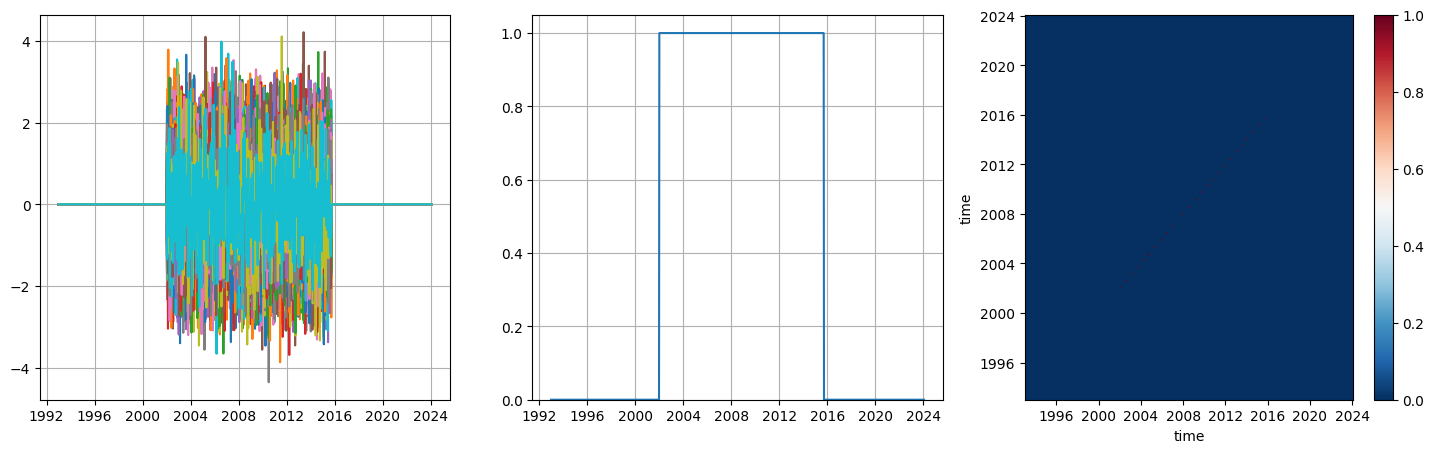

In [3]:
a=data.lntime.covariance_analysis()
a.add_errors('random',1,None,lenapy.utils.time.JJ_to_date(19000),lenapy.utils.time.JJ_to_date(24000),None)
a.visu()

Build the covariance matrix corresponding to bias uncertainty at a given date

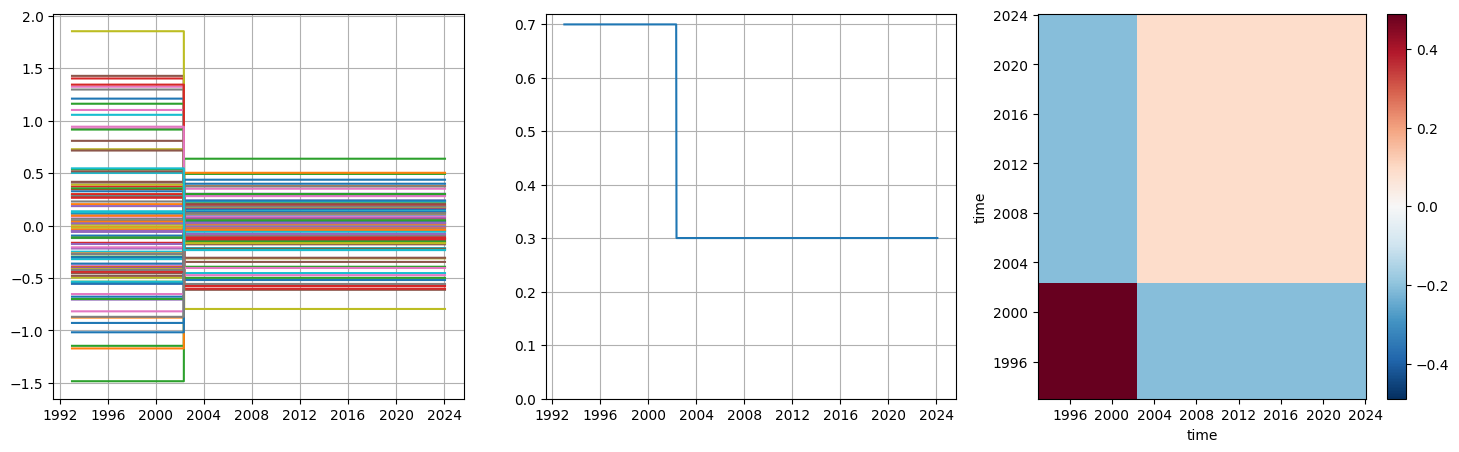

In [4]:
a=data.lntime.covariance_analysis()
a.add_errors('bias',1,lenapy.utils.time.JJ_to_date(19116),None,None,None,'centered')
a.visu()

Build the covariance matrix corresponding to a drift uncertainty between to dates

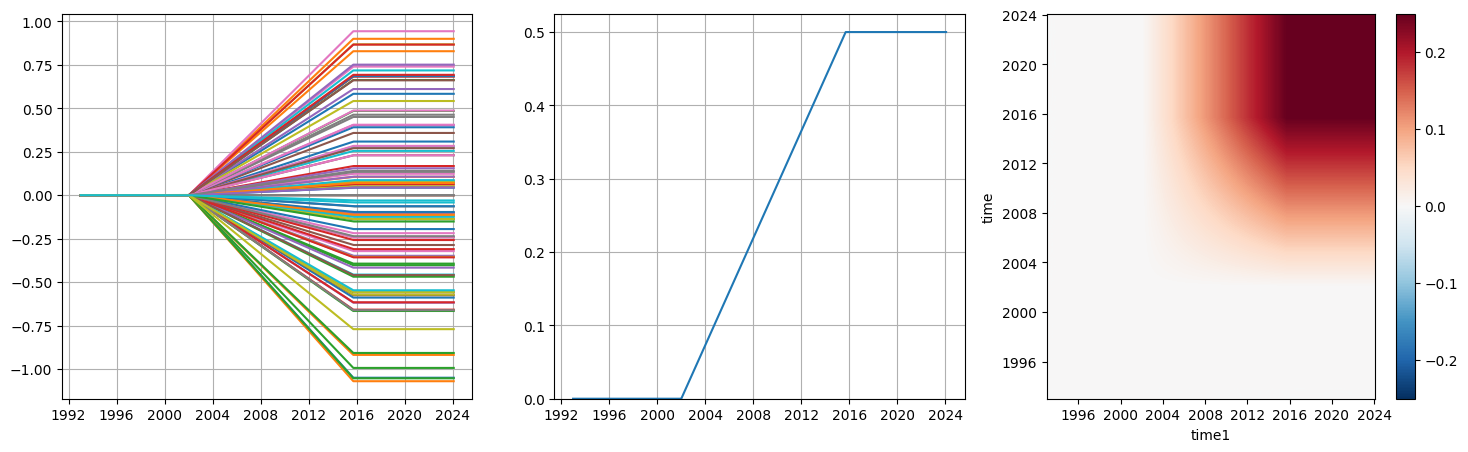

In [5]:
a=data.lntime.covariance_analysis()
a.add_errors('drift',0.0001,None,lenapy.utils.time.JJ_to_date(19000),lenapy.utils.time.JJ_to_date(24000),None,'right')
a.visu()

Build the covariance matrix corresponding to a correlated noise uncertainty over 2 years (73 days) between to dates

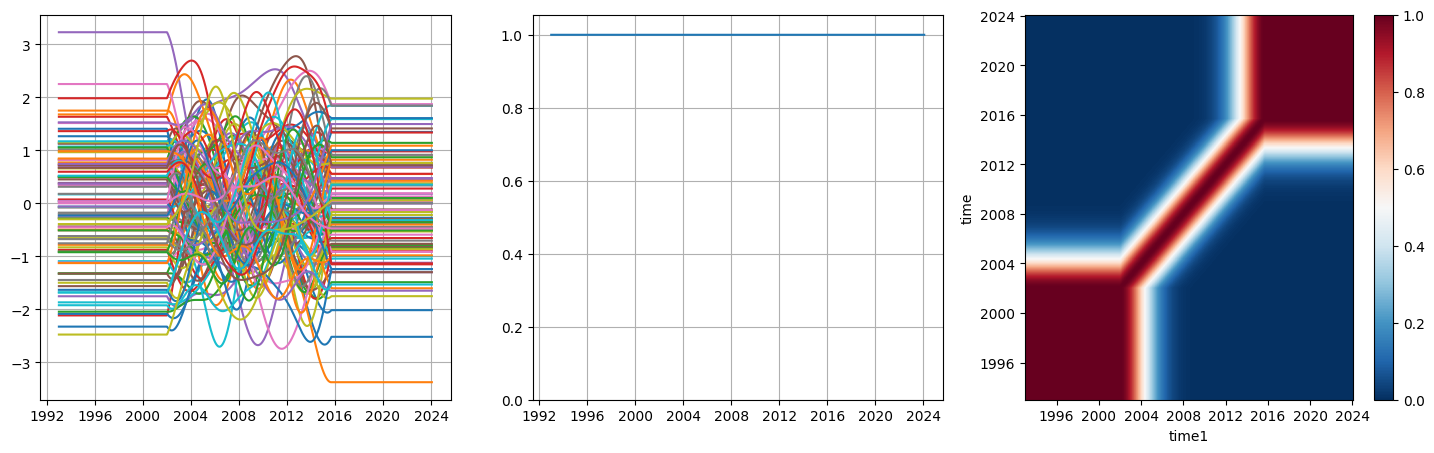

In [6]:
a=data.lntime.covariance_analysis()
a.add_errors('noise',1,None,lenapy.utils.time.JJ_to_date(19000),lenapy.utils.time.JJ_to_date(24000),np.timedelta64(730,'D'),None)
a.visu()

Build a covariance matrix from a yaml file

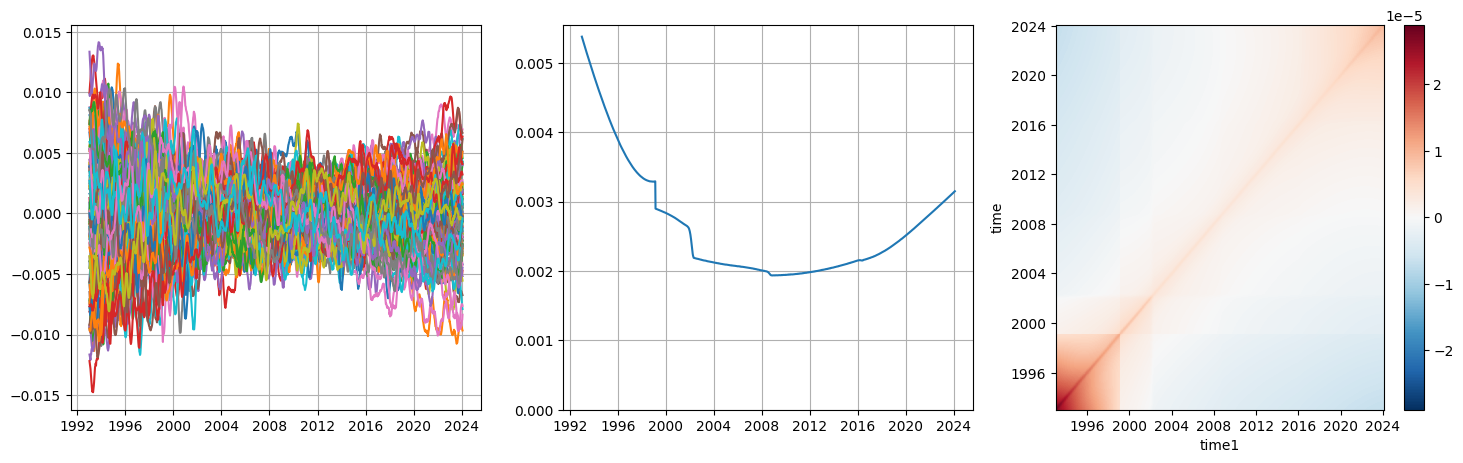

In [7]:
error_prescription="../../data/errors.yaml"
cov=data.lntime.covariance_analysis()
cov.read_yaml(error_prescription)
cov.visu()

Perform OLS regressions on the gmsl timeseries

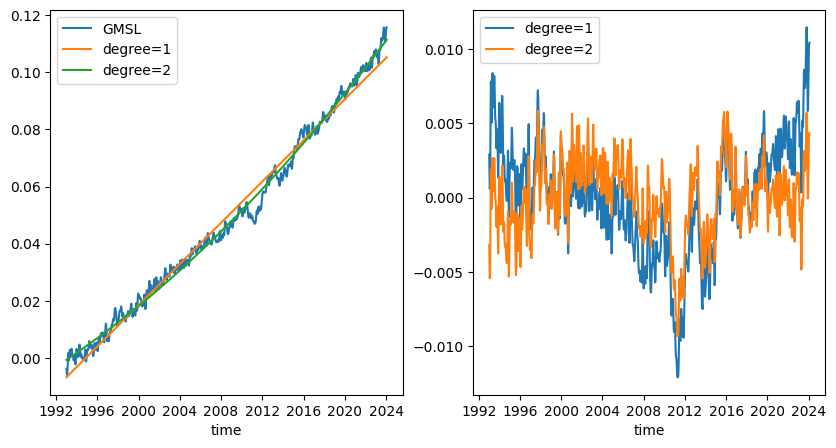

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

data.plot(ax=ax1,label='GMSL')

# Degree 1
est=data.lntime.OLS(degree=1)
est.estimate.plot(ax=ax1,label='degree=1')
est.residuals.plot(ax=ax2,label='degree=1')

# Degree 2
est=data.lntime.OLS(degree=2)
est.estimate.plot(ax=ax1,label='degree=2')
est.residuals.plot(ax=ax2,label='degree=2')

ax1.legend()
ax2.legend()

Perform an GLS regressions on the gmsl timeseries with the built covariance matrix

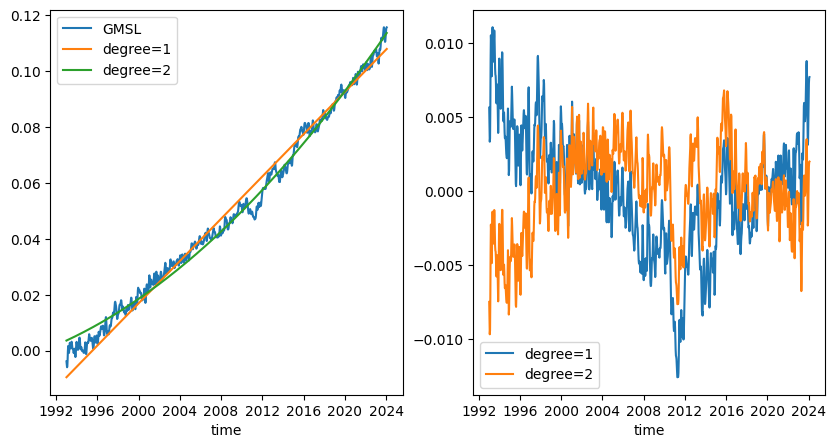

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

data.plot(ax=ax1,label='GMSL')

# Degree 1
est=data.lntime.GLS(degree=1,sigma=cov.sigma)
est.estimate.plot(ax=ax1,label='degree=1')
est.residuals.plot(ax=ax2,label='degree=1')

# Degree 2
est=data.lntime.GLS(degree=2,sigma=cov.sigma)
est.estimate.plot(ax=ax1,label='degree=2')
est.residuals.plot(ax=ax2,label='degree=2')

ax1.legend()
ax2.legend()